# Homework 5 

## Part 1 - REST API

A communication framework for applications, i.e. REST API is used to fetch data from a resource page on the web, in this case from the Nobel Prize REST API.

The fetched data will be converted to JSON format and it will provide us with information about the Nobel Prizes. The requested data will focus on information about the prizes in physics through the years 2000 - 2010. The goal is to extract the written motivations for each prize for the specified period. These expressed motivations are then used to create a so call wordcloud based on the frequency of words used.


 Importing modules to be used for communication and visualization:


In [149]:

# Modules enabling communication between client and server
import requests
import json

# Modules for visualisation
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd



Request data about nobelprizes in physics from year 2000 to 2010
at a specified loaction:


In [151]:

# Stating base location
base_url= "http://api.nobelprize.org/2.1"

# Specifying additional location info
endpoints = "/nobelPrizes"

# Specifying the parameters of the request
query = {
    "offset": 1,
    "limit": 10,
    "sort": "asc",
    "nobelPrizeYear": 2000,
    "yearTo": 2010,
    "nobelPrizeCategory": "phy",
    "format": "json"
}

# request and get data
response = requests.get(base_url + endpoints, params=query)



Convert the obtained data to a readable JSON format:


In [153]:

# Make sure the response is in json format
data = response.json()




Dispay the format for only the first year, i.e. 2000 to get an idea of how to
proceed when extracting the specified info.


In [159]:

# Print first year only in a structured layout
print(json.dumps(data["nobelPrizes"][0], indent=4))


{
    "awardYear": "2001",
    "category": {
        "en": "Physics",
        "no": "Fysikk",
        "se": "Fysik"
    },
    "categoryFullName": {
        "en": "The Nobel Prize in Physics",
        "no": "Nobelprisen i fysikk",
        "se": "Nobelpriset i fysik"
    },
    "dateAwarded": "2001-10-09",
    "prizeAmount": 10000000,
    "prizeAmountAdjusted": 13927869,
    "links": [
        {
            "rel": "nobelPrize",
            "href": "https://api.nobelprize.org/2/nobelPrize/phy/2001",
            "action": "GET",
            "types": "application/json"
        }
    ],
    "laureates": [
        {
            "id": "738",
            "knownName": {
                "en": "Eric Cornell"
            },
            "fullName": {
                "en": "Eric A. Cornell"
            },
            "portion": "1/3",
            "sortOrder": "1",
            "motivation": {
                "en": "for the achievement of Bose-Einstein condensation in dilute gases of alkali atoms, and


Loop through the data and extract all the different motivations in english for each year.
Assuming the motivation is the same for laureates that share a prize, 
it is sufficient to get hold of the motivation for the first laureat in the list each year. 

Generate a wordcloud from the words found in all the stated motivations.


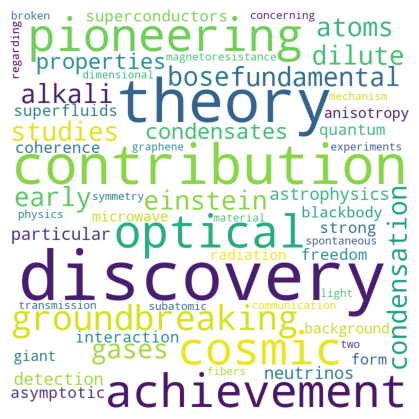

In [169]:


# Get number of years 
year_span = len(data["nobelPrizes"])

# Extract the list of nobelprizes for the requested period
nobelPrize_list = data["nobelPrizes"]

# Prepare an empty list to store words
motivation_list = []

# Loop through the number of years
for year in range(0,year_span):
    
    # Get the list of laureates for specific year
    laureat_list = nobelPrize_list[year]["laureates"]
    
    # Store motivation for this year in the list. It is same motivation for sharing laureates
    motivation_list.append(laureat_list[0]["motivation"]["en"])

# Join all motivations to one singel text with lower case
text = " ".join(motivation_list).lower()
 
# Define stopwords, using the predefined ones    
defined_stopwords = set(STOPWORDS)

# Generate wordcloud from text without stopwords
wordcloud = WordCloud(width=800, height=800, 
                      background_color="white", 
                      stopwords=defined_stopwords, min_font_size=6).generate(text)
    
    
# plot the WordCloud image                       
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


## Part 2 - Web Scraping     

When resources on the web do not have an API or is not open to public, it is still possible to retreive information available on websites by web scraping.

Requests are made to the specified location and the response will be in HTML format.
Once the data is in html, it is possible to look for the requested information by the use of identifiers in the code, as tags and attributes.

This exercise will use web scraping to retrieve information about books from a webpage. The extracted data will conisist of the upc, title, price and rating of each book. The data will be summarized and presented in the form of a table.   



Import necessary modules in panda for web scraping


In [175]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import json

In [177]:
# Specify the main location
URL = "https://books.toscrape.com"

# Make a request to get hold of data
r = requests.get(URL)


In [179]:

# Use python module to structure the content
html = BeautifulSoup(r.content)


In [195]:

# Find all books using relevant identifiers.  Data will be stored in a list.
books = html.find_all("article", attrs={"class": "product_pod"})

# Initiate an empty list to store the final data
book_table = []

# Create a mapping to convert the rating as a string to a number
hash_map = {"Zero": 0, "One": 1, "Two": 2, "Three": 3, "Four": 4, "Five": 5}

# Loop through all books
for bookpage in books:
    
    # Define the link to each bookpage
    link= URL + "/" + bookpage.find("a")["href"]

    # Request data from the specified bookpage
    r = requests.get(link)
    
    # Structure html data about the book
    sub_html = BeautifulSoup(r.content)
    
    # Get hold of the title as text
    book_title = sub_html.find("h1").text
   
    # Find table with data about the book
    book_id = sub_html.find("table").find_all("td")
    
    # Get hold of upc and price data about the book as text
    book_upc = book_id[0].text
    book_price = book_id[3].text
    
    # Find data about the rating
    book_ratings = sub_html.find("p", attrs={"class": "star-rating"})
    
    # Convert the rating to a number
    book_rating = hash_map[book_ratings["class"][1]]

    # Fill list with book data
    book_table.append( {"upc": book_upc, 
                        "title": book_title, 
                        "price": book_price, 
                        "rating": book_rating} )

# Convert the list to a dataframe    
df_book_table = pd.DataFrame(book_table)



In [197]:
# Display the dataframe
df_book_table.head()

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,3
1,90fa61229261140a,Tipping the Velvet,£53.74,1
2,6957f44c3847a760,Soumission,£50.10,1
3,e00eb4fd7b871a48,Sharp Objects,£47.82,4
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,5
